# Python 3 - An introduction to NumPy

In [1]:
import numpy as np

## What is NumPy?

- NumPy = numerical Python (working with multidimensional array objects as vectors and matrices)
- NumPy contains a collection of operations for working with these objects.
- NumPy + SciPy + Matplotlib = replacement for MATLAB
- no distinguishment between matrices and vectors: both are arrays of different dimensions

## Basics

### Vector creation

In [2]:
# Create a simple vector
a = np.array([1,0,2])
print (a)
a.dtype

[1 0 2]


dtype('int32')

The data type is chosen automatically. But sometimes that will not be what you need, so you can do this yourself. See below.

In [3]:
# Create another vector
C = np.array([1,2,0], dtype=complex )
print (C)
C.dtype

[1.+0.j 2.+0.j 0.+0.j]


dtype('complex128')

You can choose between all Python data types, such as integer, float, boolean, single characters, complex numbers or otheres (see Python documentation for this).

### Matrix creation

If you know all elements, you may create a matrix in the following way:

In [4]:
# Create matrix like vector, both are arrays
B = np.array([[1,2,0],[2,0,1],[0,1,2]])
print (B)
B.dtype

[[1 2 0]
 [2 0 1]
 [0 1 2]]


dtype('int32')

What if you just know the dimension but not all entries? That is also possible! For example in the following ways:

In [5]:
D = np.zeros((2,3), dtype=np.int16 ) 
print ("D=\n",D)
E = np.zeros ((2,3))
print ("E=\n",E)

D=
 [[0 0 0]
 [0 0 0]]
E=
 [[0. 0. 0.]
 [0. 0. 0.]]


Remark: You can also create arrays of higher dimensions if needed.

## Functions evaluation with arrays

Let's imagine you have to plot a function f(x). To plot that Python needs points. So first we create an array consisting of x.

In [6]:
#np.arange(startpoint, endpoint, stepsize)
x1 = np.arange( 0, 2.1, 0.1 )
print (x1)

#np.linspace(startpoint, endpoint, number of points in between -> useful for many entries)
from numpy import pi
x2 = np.linspace( 0, 2*pi, 100 )
#print (x2)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


Now let's take one of those arrays and compute the y values. They will be an array of the same size and dimension as the x values.

In [7]:
f1 = np.sin(x2)
#print(f1)

f2 = x1*x1
#print(f2)

Remark: If you are unsure if calculations go correctly, print the results and check some examples.

### Plotting a function

In [8]:
import matplotlib.pyplot as plt

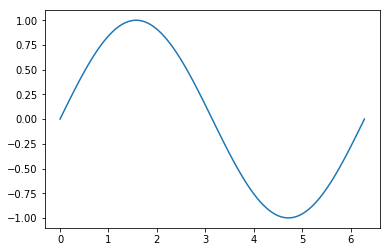

In [9]:
plt.plot(x2,f1) 
plt.show()

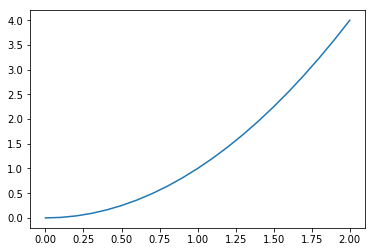

In [10]:
plt.plot(x1,f2)
plt.show()

## Combine commands

It is also possible to combine different commands. For example you can create a matrix out of a set of ordered numbers and specified dimensions:

In [16]:
F = np.arange(20).reshape(5,4) 
print (F)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


Here you see that Python is indexed beginning with zero. If you don't want this you have to consider it in the command line. For example change the one above to ...

In [12]:
F2 = np.arange(1,21,1).reshape(5,4)
print (F2)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]


## Various computations with arrays

### Sums of columns and rows

In [13]:
F2.sum(axis=0)                            # sum of each column

array([45, 50, 55, 60])

In [14]:
F2.sum(axis=1)                            # sum of each row

array([10, 26, 42, 58, 74])

### Some mathematical operations with vectors

In [11]:
A = np.arange(3)
print (A)

expA = np.exp(A)
print (expA)

sqrtA = np.sqrt(A)
print (sqrtA)

B = np.array([2., 0., -1.])
AplusB = np.add(A, B)
print (AplusB)

[0 1 2]
[1.         2.71828183 7.3890561 ]
[0.         1.         1.41421356]
[2. 1. 1.]


### Some mathematical operations with matrices

In [17]:
print (F)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


#### Iterating over matrix
Iterating in a multidimensional array is always done with respect to the first axis.

In [18]:
for row in F:
    print (row)

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13 14 15]
[16 17 18 19]


If you want to iterate somehow else, it is a bit more complicated. Just be creative or look it up. Python is that popular that there is nearly always someone who already found a solution for your problem. For example let's do an iteration over the columns of the matrix:

In [19]:
for column in F.T:                              # iterating over rows in transposed matrix is an option
    print (column) 

[ 0  4  8 12 16]
[ 1  5  9 13 17]
[ 2  6 10 14 18]
[ 3  7 11 15 19]


#### Matrix multiplication

In [20]:
A = np.array([[1,2],[0,-1]], dtype=np.float)
B = np.array([[3,-2],[1,-1]], dtype=np.float)
AdotB = A.dot(B)                                # the "normal" matrix product
print (AdotB)

[[ 5. -4.]
 [-1.  1.]]


There is also a cross product that could be suitable for physics: np.cross(A,B)
Further we also do have np.tensordot(A,B) with optional argument axis=1. 
It doesn't matter what you need, just look into the Python ducomentation and be sure you will find something useful.

#### Invert a matrix

In [21]:
import scipy.linalg as la

In [22]:
print (B)

[[ 3. -2.]
 [ 1. -1.]]


In [23]:
Binv = la.inv(B)
print (Binv)

[[ 1. -2.]
 [ 1. -3.]]


#### Solving linear eqation systems

In [24]:
print (AdotB)

[[ 5. -4.]
 [-1.  1.]]


In [25]:
vec_b = np.array([1,-2.5], dtype = np.float)
print (vec_b)

[ 1.  -2.5]


In [26]:
x = la.solve(AdotB,vec_b)
print (x)

[ -9.  -11.5]


## Some additional words

There are far more possibilities with NumPy, SciPy, Pandas and other modules. Feel free to check out things in this basic script and have a look into the Python documentation. There is nearly always a solution for any problem.